In [1]:
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from openTSNE import TSNE
from random import random

In [2]:
pos_embedded_tensor = np.load('positive_embedding.npy')
neg_embedded_tensor = np.load('negative_embedding.npy')

mean_vector = np.mean(pos_embedded_tensor[:16], axis=0)
identity_vector = mean_vector/np.linalg.norm(mean_vector)

In [3]:
embedded_tensor = np.concatenate((pos_embedded_tensor, neg_embedded_tensor), axis=0)
# embedded_tensor = neg_embedded_tensor

In [4]:
# embedding = TSNE().fit(embedded_tensor)

In [5]:
# plt.figure()
# plt.scatter(embedding[:16, 0], embedding[:16, 1])
# plt.scatter(embedding[16:, 0], embedding[16:, 1])
# plt.show()

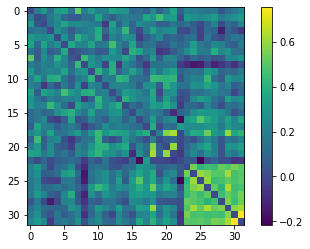

In [6]:
correlation_matrix = embedded_tensor @ embedded_tensor.T

for i in range(len(correlation_matrix)): correlation_matrix[i, i] = 0 

plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.show()

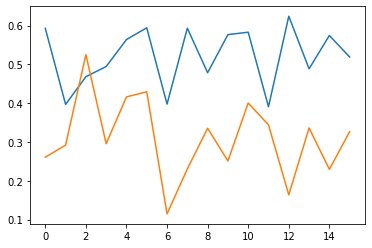

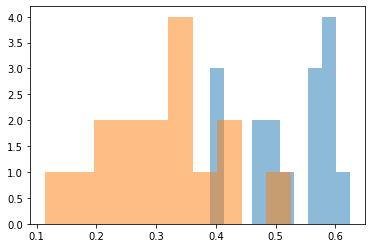

In [7]:
scores = embedded_tensor @ identity_vector

plt.figure()
plt.plot(scores[:16])
plt.plot(scores[16:])
plt.show()

plt.figure()
plt.hist(scores[:16], alpha=0.5)
plt.hist(scores[16:], alpha=0.5)
plt.show()

In [8]:
np.sum(pos_embedded_tensor[0, :] ** 2) # normalized output

0.9999995

In [11]:
r = 128

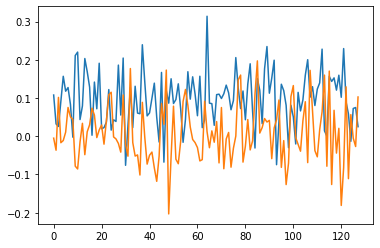

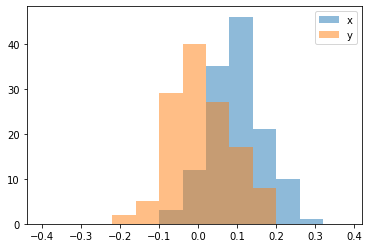

In [21]:
random_matrix = np.random.rand(r, 192) - 0.5
random_pos_matrix = random_matrix / np.linalg.norm(random_matrix, axis=1, keepdims=True)


random_matrix = np.random.rand(r, 192) - 0.5
random_neg_matrix = random_matrix / np.linalg.norm(random_matrix, axis=1, keepdims=True)

mean_vector = np.mean(random_pos_matrix, axis=0)
identity_vector = mean_vector/np.linalg.norm(mean_vector)

embedded_tensor = np.concatenate((random_pos_matrix, random_neg_matrix), axis=0)

scores = embedded_tensor @ identity_vector

plt.figure()
plt.plot(scores[:r])
plt.plot(scores[r:])
plt.show()

plt.figure()
plt.hist(scores[:r], alpha=0.5, bins=np.arange(-0.4, 0.4, 0.06))
plt.hist(scores[r:], alpha=0.5, bins=np.arange(-0.4, 0.4, 0.06))
plt.legend(['x', 'y'])
plt.show()